In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer

# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

In [155]:
df1 = pd.read_csv("spam.csv",encoding='latin')
df = df1[['v1','v2']]
df.columns = ['label', 'text']

In [156]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [158]:
df.isna().sum()

label    0
text     0
dtype: int64

In [159]:
df.duplicated().sum()

403

In [160]:
df = df.drop_duplicates()
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='count', ylabel='label'>

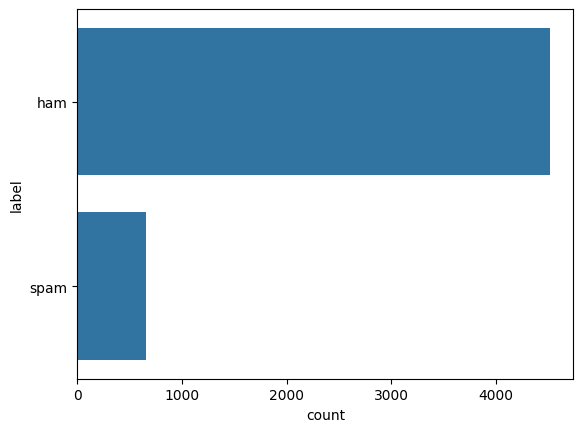

In [161]:
sns.countplot(df.label)

In [162]:
df.describe()

,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [163]:
spam_texts = df[df['label'] == 'spam']['text']
ham_texts = df[df['label'] == 'ham']['text']

In [164]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
def get_ngram_freq(texts, n):
    all_ngrams = []
    for text in texts:
        words = preprocess_text(text)
        ngrams_list = list(ngrams(words, n))
        all_ngrams.extend(ngrams_list)
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(20)

In [166]:
nltk.download('punkt')

print("Spam Word Frequencies:", get_ngram_freq(spam_texts,1))
print("Ham Word Frequencies:", get_ngram_freq(ham_texts,1))
print("Spam Bigram Frequencies:", get_ngram_freq(spam_texts, 2))
print("Ham Bigram Frequencies:", get_ngram_freq(ham_texts, 2))
print("Spam Trigram Frequencies:", get_ngram_freq(spam_texts, 3))
print("Ham Trigram Frequencies:", get_ngram_freq(ham_texts, 3))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Spam Word Frequencies: [(('call',), 302), (('free',), 191), (('txt',), 130), (('u',), 119), (('ur',), 119), (('mobile',), 105), (('text',), 104), (('stop',), 104), (('claim',), 96), (('reply',), 96), (('prize',), 81), (('get',), 70), (('new',), 64), (('send',), 58), (('urgent',), 57), (('nokia',), 54), (('cash',), 51), (('contact',), 51), (('please',), 49), (('service',), 48)]
Ham Word Frequencies: [(('u',), 883), (('get',), 293), (('gt',), 288), (('lt',), 287), (('go',), 240), (('got',), 236), (('know',), 225), (('like',), 221), (('ok',), 217), (('good',), 212), (('come',), 211), (('ur',), 197), (('time',), 188), (('call',), 184), (('love',), 172), (('day',), 166), (('going',), 164), (('want',), 159), (('lor',), 159), (('one',), 158)]
Spam Bigram Frequencies: [(('please', 'call'), 40), (('guaranteed', 'call'), 21), (('call', 'landline'), 21), (('prize', 'guaranteed'), 20), (('po', 'box'), 20), (('urgent', 'mobile'), 17), (('send', 'stop'), 17), (('call', 'claim'), 16), (('selected', '

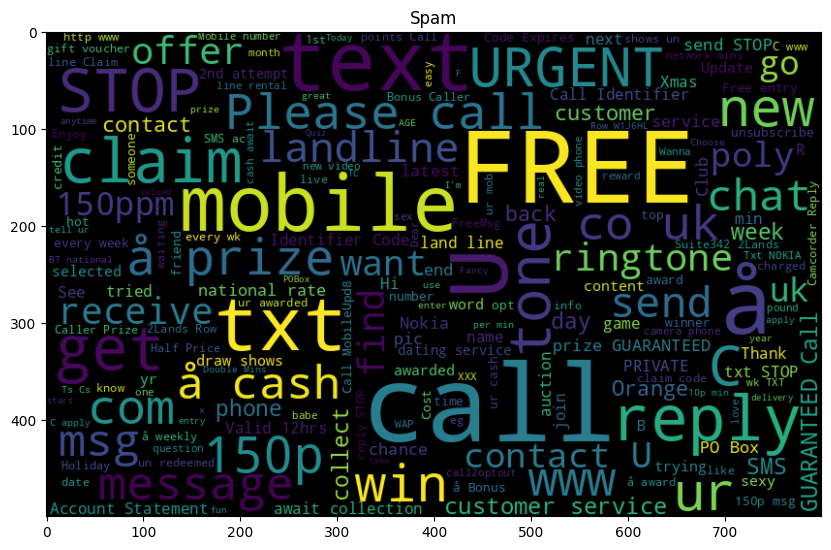

In [167]:
all_words = ' '.join([text for text in spam_texts])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,stopwords=stop_words).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Spam')
plt.show()

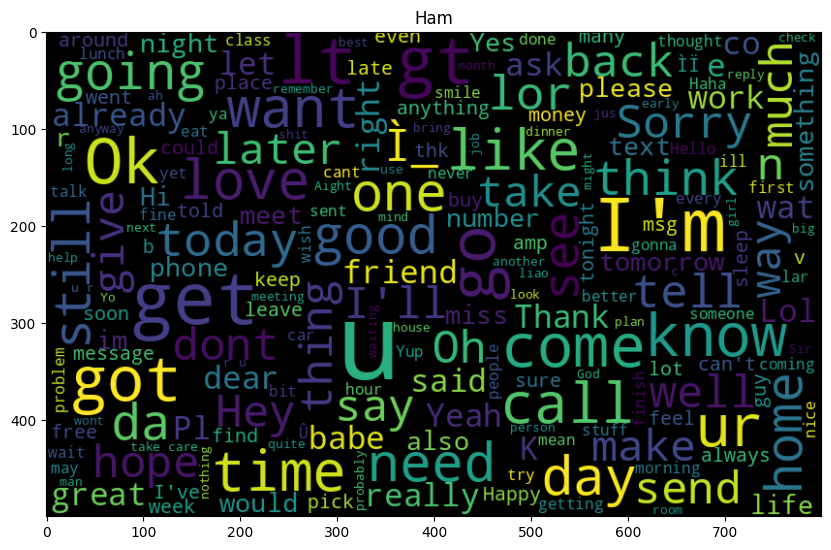

In [168]:
all_words = ' '.join([text for text in ham_texts])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=stop_words).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Ham')
plt.show()

In [169]:
def regression(X,y):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LogisticRegression(max_iter=1000)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  score = f1_score(y_test, y_pred)
  return score

**BAG OF WORDS MODEL**

In [170]:
#Bag-of-Words model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

 *F1 SCORE FOR BAG OF WORDS*

In [171]:
# Bag OF Words F1 Score
regression(X,y)


0.9104477611940299

**TFIDF MODEL**

In [172]:
# Tfidf model
tfidf = TfidfVectorizer(stop_words='english')
X_tf = tfidf.fit_transform(df['text'])

*F1 SCORE FOR TFIDF*

In [173]:
# TFIDF F1 Score
regression(X_tf,y)

0.7542372881355932

In [174]:
#convert to lower case, remove stop words, remove email-ids, urls and html tags if any, remove numbers, remove punctuation marks and apply lemmatization
nltk.download('wordnet')

def preprocess_full_text(text):
    text = text.lower()
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess_full_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**TFIDF WITH CLEANING MODEL**

In [175]:
tfidf_clean = TfidfVectorizer(stop_words='english')
X_tfidf_clean = tfidf_clean.fit_transform(df['clean_text'])

*F1 SCORE FOR TFIDF WITH CLEANING*

In [176]:
regression(X_tfidf_clean, y)

0.7553648068669528

# **SUMMARY OF ALL F1 SCORES**

In [177]:
# PRINTING ALL F1 SCORES
print('F1 Bag of Words',regression(X,y))
print('F1 TFIDF',regression(X_tf,y))
print('F1 TFIDF + Preprocessing',regression(X_tfidf_clean, y))


F1 Bag of Words 0.9104477611940299
F1 TFIDF 0.7542372881355932
F1 TFIDF + Preprocessing 0.7553648068669528
